# Basic classification

In [18]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.optimizers import Adam

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


# Import the Fashion MNIST Dataset

In [19]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [20]:
# Define class names for reference

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the Data

In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
len(train_labels)

60000

In [23]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
test_images.shape

(10000, 28, 28)

In [25]:
len(test_labels)

10000

# Preprocess the data

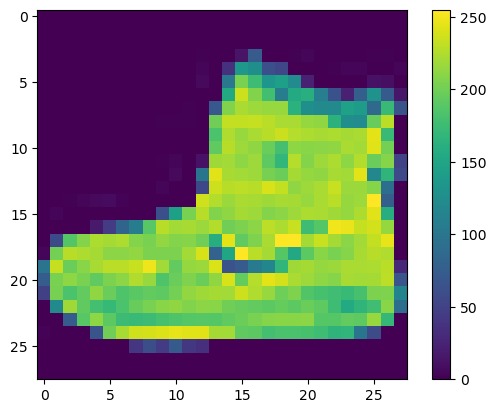

In [26]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [27]:
train_images = train_images / 255.0

test_images = test_images / 255.0

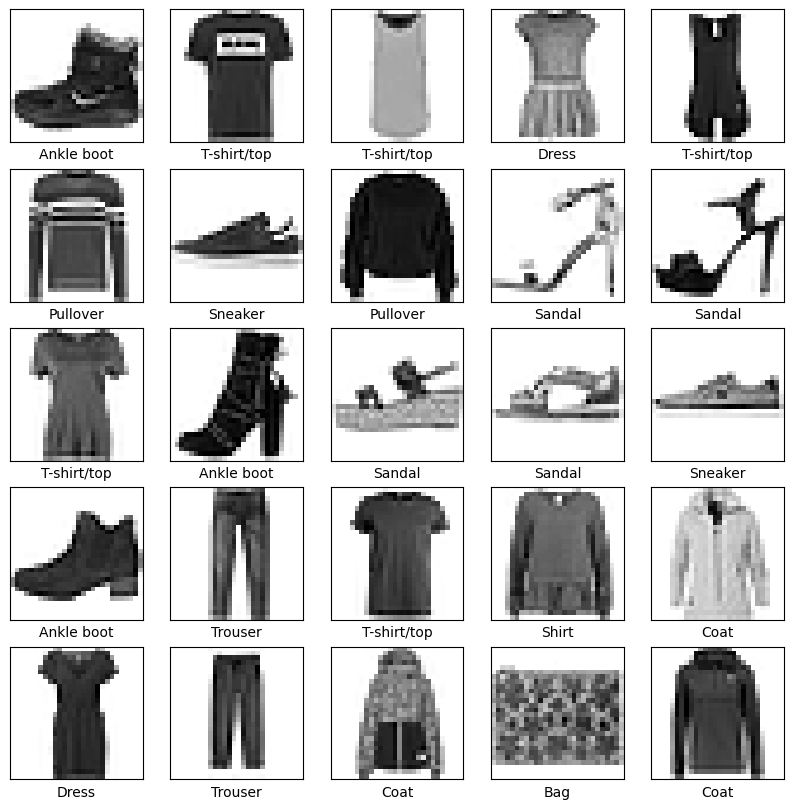

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    # plt.imshow(x_train[i], cmap=plt.cm.binary)
    
    plt.xlabel(class_names[train_labels[i]])
    #plt.title(class_names[y_train[i]])

# Build the model

**Setup the layers**

In [29]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    keras.layers.Dense(128, activation=tf.nn.relu),   # Fully connected layer with 128 units and ReLU activation
    keras.layers.Dense(10, activation=tf.nn.softmax)  # Output layer with 10 units for 10 classes and softmax activation
])

# Compile the model

In [32]:
# Compile the model
optimizer = tf.keras.optimizers.Adam()  # Using Adam optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [34]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5013 - accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3776 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3400 - accuracy: 0.8759
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3143 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.8910


# Evaluate accuracy

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
# test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3518 - accuracy: 0.8726
Test accuracy:  0.8726000189781189


# Make predictions

In [36]:
predictions = model.predict(test_images)
# y_pred_probs = model.predict(x_test, verbose=0)

313/313 [==============================] - 0s 1ms/step


In [37]:
predictions[0]

array([3.77402876e-06, 1.02837050e-09, 1.08588878e-07, 1.04671585e-07,
       2.49129943e-08, 3.18466988e-03, 1.41876910e-06, 1.76206511e-02,
       1.75700807e-05, 9.79171574e-01], dtype=float32)

In [38]:
np.argmax(predictions[0])

9

In [39]:
test_labels[0]

9

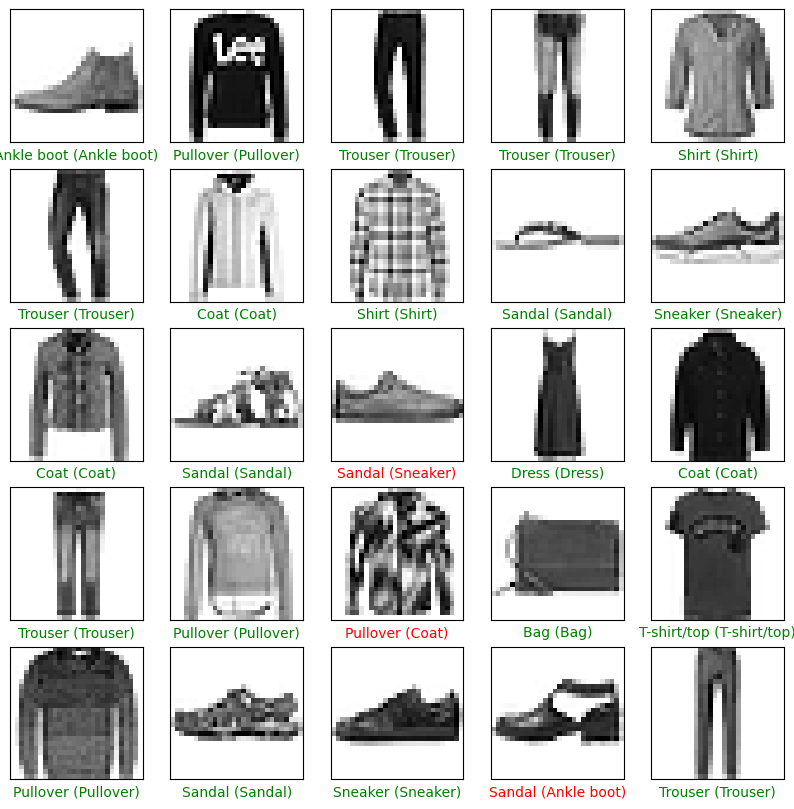

In [40]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red

plt.figure(figsize=(10, 10))

for i in range(25):
    # Display the original image
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel('{} ({})'.format(class_names[predicted_label],
                               class_names[true_label]),
                                color = color)

In [41]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [42]:
# Add the image to a batch where it's the only member

img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [43]:
# Now predict the image

predictions = model.predict(img)

print(predictions)

1/1 [==============================] - 0s 50ms/step
[[3.7740324e-06 1.0283705e-09 1.0858888e-07 1.0467179e-07 2.4912994e-08
  3.1846729e-03 1.4187705e-06 1.7620634e-02 1.7570132e-05 9.7917157e-01]]


In [45]:
prediction = predictions[0]

np.argmax(prediction)

0